Confusion Matrix:
[[ 18  13]
 [  3 166]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.58      0.69        31
           1       0.93      0.98      0.95       169

    accuracy                           0.92       200
   macro avg       0.89      0.78      0.82       200
weighted avg       0.92      0.92      0.91       200

Accuracy: 0.92


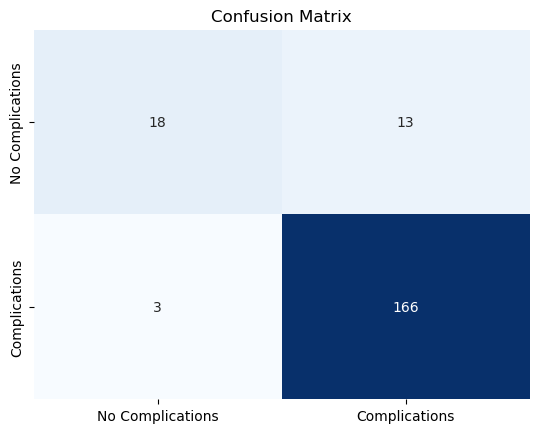

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"E:\pre operative data.csv")

# Preprocess the data
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

X = data.drop(columns=['Post Surgical Complications'])
y = data['Post Surgical Complications']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model

model = SVC(kernel='rbf', random_state=42, C=1, gamma='scale')
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

def plot_confusion_matrix(cm, classes):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')


cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(cm, classes=['No Complications', 'Complications'])